# Project Proposal Promt

Submit a 1-2 page proposal as a group answering the following questions:
- What will you model?
- What observable quantity will your model predict?
- How will you know if your model is any good?
- What have other people already done to model this phenomenon?  Will you use one of these models or develop one of your own? 
- What references or sources of information will you draw on to learn about your system and develop an appropriate model?
- What data sources, if any, can you use to estimate parameters in your model class to specify your particular model?

# What will you model?

We plan to model the annual energy production (AEP) of a wind farm in a new way. 


# What observable quantity will your model predict?

Our model will specifically be used to predict the annual energy production (AEP) of a wind farm

# How will you know if your model is any good?
There are many existing models for AEP, and a wealth of published research results. We will compare our results to an open source wind farm code, [FLOWFarm](https://github.com/byuflowlab/FlowFarm.jl) being developed by one of our team members, as well as publised results.

# What have other people already done to model this phenomenon? Will you use one of these models or develop one of your own?

The AEP is generally given by the following equations.

\begin{equation}
    AEP = \frac{hours}{day}\frac{days}{year}\sum_{k=1}^{N_D} f_k \sum_{j=1}^{N_T} P_{jk}
\end{equation}

Where $N_D$ is the number of wind directions, $N_T$ is the number of turbines, and $P_{jk}$ is the power of turbine $j$ when the wind is from direction $k$, which is in turn generally calculated by

\begin{equation}
P = 
\begin{cases}
    0 & \bar{u}_j < u_{cut-in}\\
    0.5 \rho A_j C_{Pj} \bar{u}_j^3 & \bar{u}_j \ge u_{cut-in} and P_j < P_{rated} \\
    P_{rated} & P_j \ge P_{rated} \\
    0 & \bar{u} > u_{cut-out}
\end{cases}
\end{equation}

Where $\bar{u}_j$ is the effective velocity seen by the wind turbine. The effective velocity is typically calculated using any one of the many extant wind turbine wake models in combination with a wind farm model. Wind turbine wake models predict the wake velocity deficit in a given wind turbine wake, wind farm models combine the wind velocity deficits and calculate a resultant wind speed at a point given all the interacting wakes at that point.

Some common wake models are proposed in the following references:
- [1] N. O. Jensen. A note on wind generator interaction. Technical report, Risø National Laboratory, DK-4000 Roskilde, Denmark, November 1983.
- [2] G. C. Larsen. A simple stationary semi-analytical wake model. Technical report, Risø National Labora- tory, Technical University of Denmark, Roskilde, Denmark, aug 2009.
- [3] M. Bastankhah and F. Port ́e-Agel. Experimental and theoretical study of wind turbine wakes in yawed conditions. Journal of Fluid Mechanics, 806:506–541, 2016.

Some common wind farm models are proposed in the following references:
- [4] I. Katic, J. Højstrup, and N. Jensen. A simple model for cluster efficiency. In European Wind Energy Association Conference and Exhibition, Rome - Italy, October 1986. European Wind Energy Association.
- [5] A. Niayifar and F. Port ́e-Agel. Analytical modeling of wind farms: A new approach for power prediction. Energies, 9(9):1–13, 2016.

It has recently been found that, because the wake models essentially act as Gaussian basis functions for flow field, wind farm layout optimization can be improved by multiplying the standard deviation of these models so the distributions of the wakes combine, smoothing out local optima in the design space, and then slowly returning the distributions to their original size in a continuation optimization approach known as wake expansion continuation (WEC) (see [6]). Typical Gaussian continuation optimization relies on radial basis function (see [7]).

[6] J. J. Thomas and A. Ning. A method for reducing multi-modality in the wind farm layout optimization problem. In Journal of Physics: Conference Series, volume 1037, Milano, Italy, June 2018. The Science of Making Torque from Wind.

[7] H. Mobahi and J. F. III. A theoretical analysis of optimization by gaussian continuation. 2015.)

Because the typical approach to modeling AEP involves discretization and modeling each wind direction individually, many wind directions are needed to avoid having optimized layouts dependent on the specific directions used in the discretization. The discrete definition comes primarily from the ways the models are built up from bottom up, starting with the flow of wind through and around a single wind turbine with a single wind direction.

We plan to model the flow field as a radial (though not axis-symmetric) distribution centered at each wind turbine location. These radial distributions could then be combined using a norm that would in turn predict the average flow field, or perhaps wind turbine power, throughout the wind farm. These averaged values will then be integrated or combined in some way to predict the AEP. 

The main benefits that are expected from modelling the farm in this way are (1) reduced computational cost, and (2) improved application and use of the WEC method for wind farm layout optimization.

# What references or sources of information will you draw on to learn about your system and develop an appropriate model?

We will draw on most of the sources mentioned above to learn about our system. For model development we will base our work on the simplist of wake models, given in [1], and the wind farm model most commonly used in conjunction with it, given in [4].

# What data sources, if any, can you use to estimate parameters in your model class to specify your particular model?

Our primary data source will likely need to be generated by us. This will most likely be done using the open-source software package [FLOWFarm](https://github.com/byuflowlab/FlowFarm.jl) mentioned previously.

# Proof of Concept

In [1]:
using Plots; pyplot();
using LaTeXStrings

SyntaxError: invalid syntax (<ipython-input-1-70b118226ec1>, line 1)

#### Radial Gaussian Basis Function
\begin{align}
     \varphi =& e^{-(\epsilon r)^2/(\sigma^2)}\\
     r =& sqrt(x^2+y^2) \\
     \varphi =& e^{-\big(\epsilon \sqrt{(x-x_0)^2+(y-y_0)^2}\big)^2/(\sigma^2)}
\end{align}

In [2]:
# define radial gaussian basis function
g(x,y,x0,y0,s) = exp(-(sqrt((x-x0)^2 + (y-y0)^2))^2/(s))
g(x,y) = g(x,y,0,0,1)

g (generic function with 2 methods)

In [3]:
# define area of interest
x = collect(-5:0.1:5);
y = collect(-5:0.1:5);

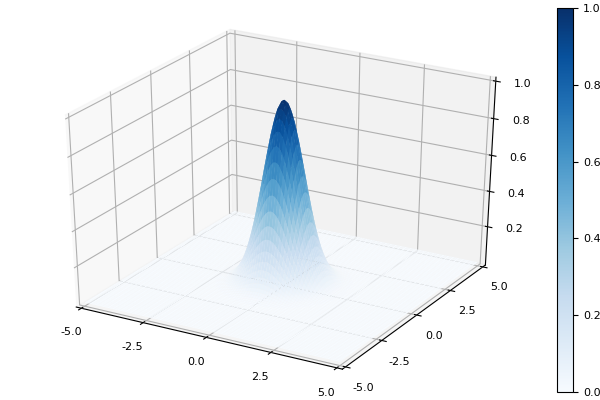

In [4]:
# plot results with single RGBF at origin
plot(x,y,g,st=:surface,color=:Blues)

In [5]:
# define space with multiple RGBFs
function mg(x,y,x0,y0,s)
    z = zeros(length(x),length(y))
    n = length(x0)
    for i = 1:n
        for j in 1:length(x)
            for k in 1:length(y)
                z[j,k] += (g(x[j],y[k],x0[i],y0[i],s)).^2
            end
        end
    end
    return sqrt.(z)
        
end

mg (generic function with 1 method)

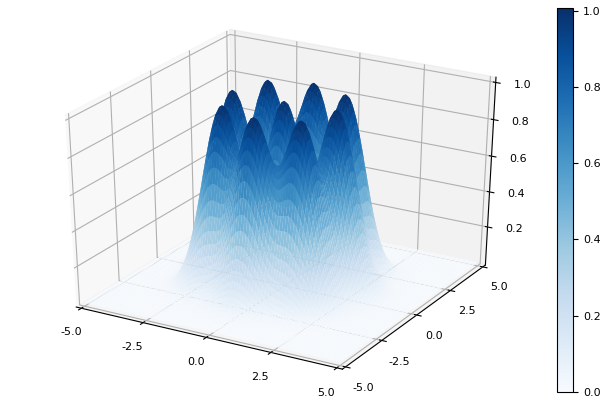

In [6]:
# define points for basis functions
x0 = [0, 1.5, 1.5, -1.5, -1.5, 0, 0, 2, -2]
y0 = [0, 1.5, -1.5, 1.5, -1.5, 2, -2, 0, 0]

# calculate field
z = mg(x,y,x0,y0,1)

# plot with multiple RGBFs
plot(x,y,z,st=:surface,color=:Blues)

In [7]:
# calculate change as standard deviation is increased
z1 = mg(x,y,x0,y0,1)
z2 = mg(x,y,x0,y0,2)
z3 = mg(x,y,x0,y0,3)
z4 = mg(x,y,x0,y0,4)
z5 = mg(x,y,x0,y0,5)
z6 = mg(x,y,x0,y0,6);
z7 = mg(x,y,x0,y0,7);
z8 = mg(x,y,x0,y0,8);
z9 = mg(x,y,x0,y0,9);

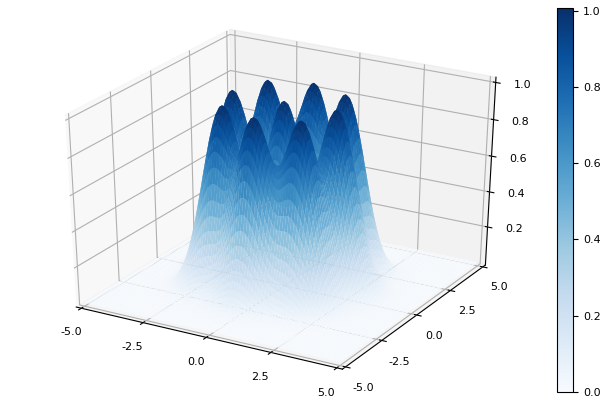

In [8]:
plot(x,y,z1,st=:surface,color=:Blues)

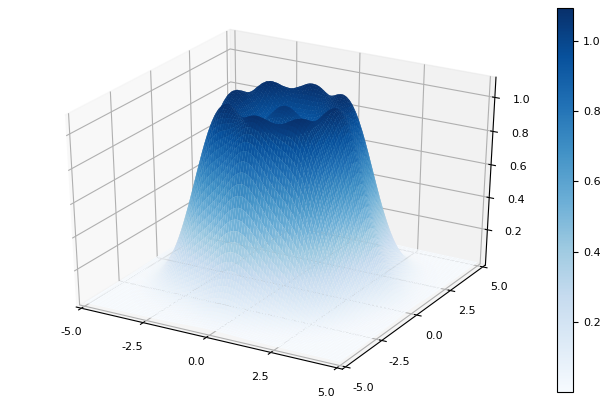

In [9]:
plot(x,y,z2,st=:surface,color=:Blues)

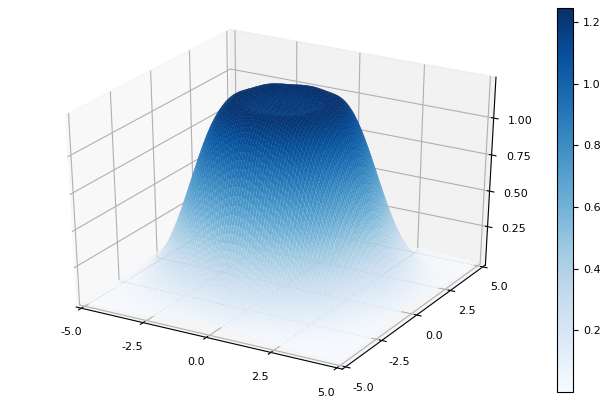

In [10]:
plot(x,y,z3,st=:surface,color=:Blues)

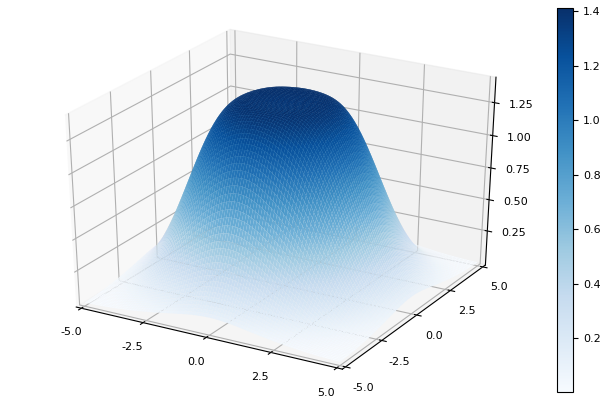

In [11]:
plot(x,y,z4,st=:surface,color=:Blues)

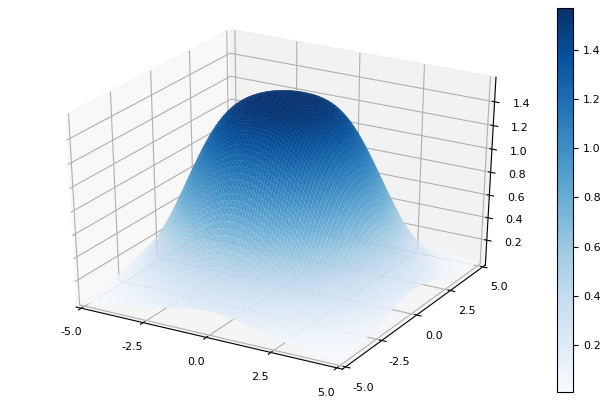

In [12]:
plot(x,y,z5,st=:surface,color=:Blues)

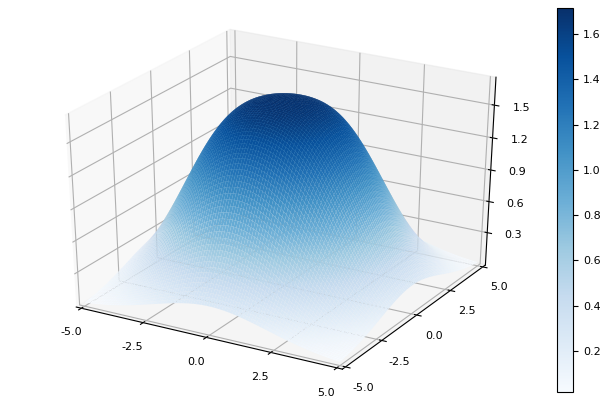

In [13]:
plot(x,y,z6,st=:surface,color=:Blues)